In [1]:
class DNA_Helper:
    '''This is a class of static methods that will be helpful while analyzing sequence data'''
    
    def read_genome(filename):
        '''This function is responsible for reading the file and returning the sequence in the string format'''
        whole_sequence = ''
        with open(filename,'r') as file:
            for line in file:
                if not line.startswith('>'):
                    whole_sequence += line.rstrip()
        return whole_sequence
    
    def read_fastq(filename):
        '''This function is responsible for reading the FASTQ file and returning the sequences and qualities'''
        sequences, qualities = [], []
        with open(filename,'r') as fh:
            while True:
                fh.readline()
                seq = fh.readline().rstrip()
                fh.readline()
                qual = fh.readline().rstrip()
                if len(seq) == 0:
                    break
                sequences.append(seq)
                qualities.append(qual)
        return sequences, qualities

    def phred33_to_quality(quality):
        '''This function does the conversion of the quality value to the number value'''
        return ord(quality) - 33
    
    def naive(p, t):
        '''naive match algorithm'''
        indices = []
        for i in range(len(t) - len(p) + 1):
            match = True
            for j in range(len(p)):
                if t[i+j] != p[j]:
                    match = False
                    break
            if match: 
                indices.append(i)
        return indices
    
    def reverse_complement(sequence):
        '''This function is responsible for reversing and returning the complement of the sequence'''
        complementary_bases = {'A':'T','C':'G','G':'C','T':'A','N':'N'}
        sequence = reversed(sequence)
        reversed_sequence = ''
        for base in sequence:
            reversed_sequence += complementary_bases[base]
        return reversed_sequence
    
    def naive_reverse_complement(p, t):
        '''naive match algorithm but taking into consideration the reverse complement string'''
        complement_sequence = DNA_Helper.reverse_complement(p)
        if complement_sequence == p:
            return DNA_Helper.naive(p,t)
        else:
            return DNA_Helper.naive(p,t) + DNA_Helper.naive(complement_sequence,t)
        
    def leftmost_occurence(s1,genome):
        '''This function returns the leftmost occurence of some sequence or its complement'''
        s2 = DNA_Helper.reverse_complement(s1)
        s1_index = DNA_Helper.naive(s1,genome)[0] # leftmost --> zeroth index in the list
        s2_index = DNA_Helper.naive(s2,genome)[0] # leftmost --> zeroth index in the list
        if s1_index < s2_index:
            return (s1_index,'original sequence') # returns informational tuple
        elif s1_index > s2_index:
            return (s2_index,'reversed sequence') # returns informational tuple
        else:
            return (s1_index,'both sequences') # # returns informational tuple
        
    def naive_2mm(p, t):
        '''naive match algorithm that allows at most 2 mismatches'''
        indices = []
        for i in range(len(t) - len(p) + 1):
            match = True
            mismatch_count = 0
            for j in range(len(p)):
                if t[i+j] != p[j]:
                    mismatch_count += 1
                if mismatch_count > 2:
                    match = False
                    break
            if match: 
                indices.append(i)
        return indices
    
    def find_GC_by_position_mine(reads):
        '''This function calculates and returns the GC percentage in the sequence'''
        gc = []
        for read in reads:
            gc.append((read.count('C') + read.count('G')) / len(read))
        return gc


In [2]:
genome = DNA_Helper.read_genome('lambda_virus.fa.txt')

### 1) How many times 'AGGT' or its reverse complement 'ACCT' occurs in the lambda virus file? 

In [3]:
print(len(DNA_Helper.naive_reverse_complement('AGGT',genome))) # my solution
print(genome.count('ACCT') + genome.count('AGGT')) # check-validate

306
306


### 2) How many times does 'TTAA' or its reverse complement occurs in the lambda virus file?

In [4]:
print(len(DNA_Helper.naive_reverse_complement('TTAA',genome))) # my solution
print(genome.count('TTAA')) # check-validate

195
195


### 3) What is the offset of the leftmost occurence of 'ACTAAGT' or its reverse complement in the lambda virus genome?

In [5]:
sequence = 'ACTAAGT'
print(DNA_Helper.leftmost_occurence(sequence,genome)) # my solution
print(genome[26028:26028+len(sequence)] == DNA_Helper.reverse_complement(sequence)) # check-validate

(26028, 'reversed sequence')
True


### 4) What is the offset of the leftmost occurence of 'AGTCGA' or its reverse complement in the lambda virus genome?

In [6]:
sequence = 'AGTCGA'
print(DNA_Helper.leftmost_occurence(sequence,genome)) # my solution
print(genome[450:450+len(sequence)] == DNA_Helper.reverse_complement(sequence)) # check-validate

(450, 'reversed sequence')
True


### 5) How many times does 'TTCAAGCC' occur in genome? (using naive_2mm function that allows for 2 mismatches)

In [7]:
print(len(DNA_Helper.naive_2mm('TTCAAGCC',genome))) # my solution
# check-validate
pattern = 'ACT'
text = 'ACTACTT'
# should print 0, 3 and 4 in the list
print(DNA_Helper.naive_2mm(pattern,text)) # does it right

191
[0, 3, 4]


### 6) Leftmost occurance of 'AGGAGGTT' with naive_2mm

In [8]:
print(DNA_Helper.naive_2mm('AGGAGGTT',genome)[0])

49


### 7) Report the most occuring leftmost index of poor quality records in FASTQ file

In [9]:
sequences, qualities = DNA_Helper.read_fastq('ERR037900_1.first1000.fastq.txt')

In [10]:
first_read = qualities[0]
numeric_quality = [DNA_Helper.phred33_to_quality(character) for character in first_read]
print('Conversion Table:')
for i in range(len(first_read)):
    if(numeric_quality[i] < 5):
        print('Character =',first_read[i],'Numeric value =',numeric_quality[i],'==> Low Quality') # Hash Sign ==> 2
    else:    
        print('Character =',first_read[i],'Numeric value =',numeric_quality[i],'==> High Quality')

Conversion Table:
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39 ==> High Quality
Character = H Numeric value = 39

In [11]:
low_quality_indices = []
for line in qualities:
    low_quality_indices.append(line.find('#'))

In [12]:
for i in range(10):
    print(qualities[i][66]) # at the 66-th index occurs the hash sign '#' which accounts for low quality values

#
#
#
#
#
#
#
#
#
#


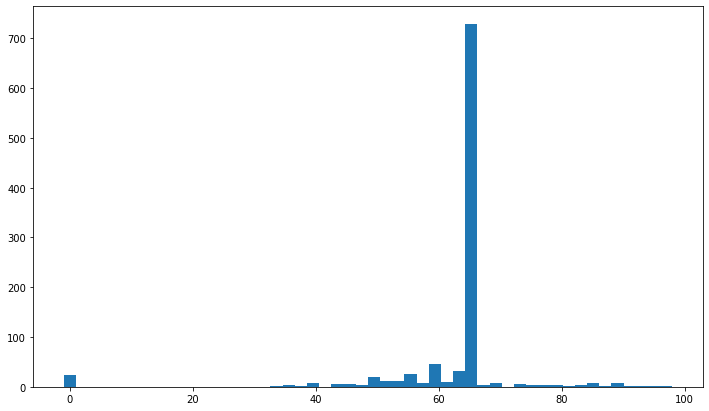

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,7))
plt.hist(low_quality_indices,bins = 50);
# most of the low quality values occur at the index 66

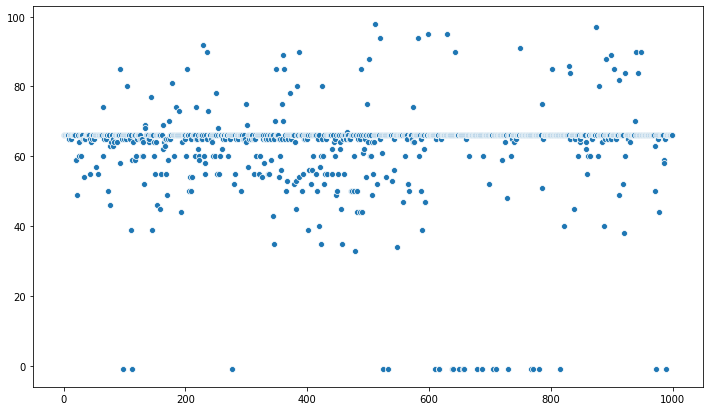

In [15]:
import seaborn as sns

# most of the low quality values occur at the index of 66.There are also some other values which are the result of natural differences or random errors
# in different cases some of the first lower values occur at the lower indices.For examplewe have some of them at 0
# also we have subgroups around 40-60 range but the majority of them start at 66 which is the most problematic index.
plt.figure(figsize = (12,7))
sns.scatterplot(range(len(low_quality_indices)),low_quality_indices)
plt.show()